In [32]:
""" code to set up general purpose model object that I can use across all modalities and experiments """

""" goal: set up model based analysis.
"""

%load_ext autoreload
%autoreload 2

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from pythonlib.drawmodel.analysis import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
animal = "Pancho";
date = 200226
expt = "pilot"
session = 1

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

targ = {
    "task_stage":["two_lines_anywhere"],
    "fracsuccess_min":[0.25]
}

trials_list = getIndsTrials(filedata, targ)
trials_list = removeRedundantTrials(filedata, trials_list)

## ============= POSITIVE CONTROL
VER="v1"
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)


found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl
got 159 total trials
THIS NOT OPTIMAL - see notes. is ok if same tasks always occur in direct succession chron order.
started with 159 trials
ended with 93 trials
[getTrialsStrokes] removing stroke for calc vel since shorter than window


In [624]:
getMultTrialsTaskStages(filedata)

got 617 total trials


{'one_dot': 28,
 'line': 116,
 'three_lines_natural': 19,
 'two_lines_anywhere': 256,
 'two_lines_natural': 20,
 'circle_partial': 172,
 'line_natural': 6}

In [183]:
from pythonlib.tools.stroketools import *
from pythonlib.drawmodel.analysis import *

    

likeliFunction = makeLikeliFunction()
priorFunction = makePriorFunction()

    
    

In [198]:

# 1) get all tasks
strokes_all = stroke_dict["strokes_all"]
# strokes_all_task = stroke_dict["strokes_all_task"]

tasks = [getTrialsTask(filedata, t) for t in trials_list]
strokes_all_task = [getTrialsTaskAsStrokes(filedata, t, fake_timesteps="from_orig") for t in trials_list]
fix_all_task = [getTrialsFix(filedata, t)["fixpos_pixels"] for t in trials_list]

for strokes, t, f in zip(strokes_all_task, tasks, fix_all_task):
    t["strokes"] = strokes
    t["fixpos"] = f

    

In [225]:
scores= np.array([-1,1])

np.any(scores>0) and np.any(scores<0)

True

(-550, 0)

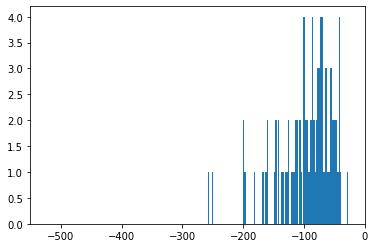

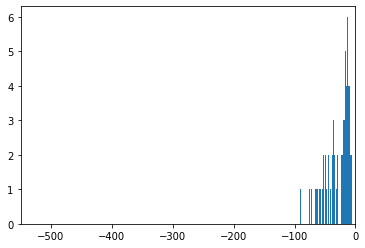

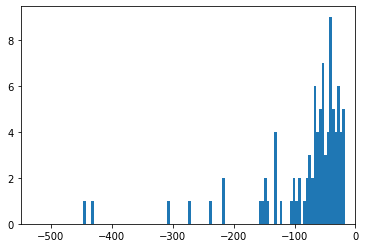

In [270]:
## apply dataset and apply model to dset
priorFunction = makePriorFunction()
likeliFunction = makeLikeliFunction()
dset = Dataset(strokes_all, tasks)
mod = Model("uniform", priorFunction, likeliFunction)
dset.applyModel(mod, prior_ver= "softmax", posterior_ver="weighted")

dset.plotPosteriorHist()
plt.xlim([-550, 0])

dset = Dataset(strokes_all, tasks)
mod = Model("uniform", priorFunction, likeliFunction)
dset.applyModel(mod, prior_ver= "softmax", posterior_ver="maxlikeli")

dset.plotPosteriorHist()
plt.xlim([-550, 0])

priorFunction = makePriorFunction(ver="prox_to_origin")
dset = Dataset(strokes_all, tasks)
mod = Model("uniform", priorFunction, likeliFunction)
dset.applyModel(mod, prior_ver= "softmax", posterior_ver="weighted")

dset.plotPosteriorHist()
plt.xlim([-550, 0])

(-550, 0)

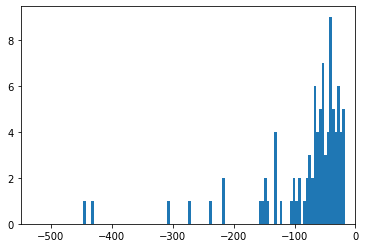

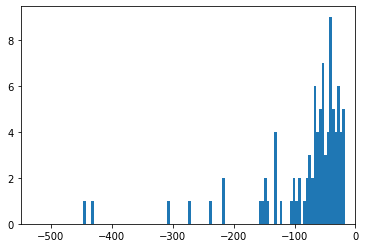

In [343]:
## apply dataset and apply model to dset
priorFunction = makePriorFunction(ver="prox_to_origin")
dset = Dataset(strokes_all, tasks)
mod = Model("uniform", priorFunction, likeliFunction)
dset.applyModel(mod, parses_split=None, prior_ver= "softmax", posterior_ver="weighted")
dset.plotPosteriorHist()
plt.xlim([-550, 0])

priorFunction = makePriorFunction(ver="prox_to_origin")
dset = Dataset(strokes_all, tasks)
mod = Model("uniform", priorFunction, likeliFunction)
dset.applyModel(mod, parses_bothdir=True, prior_ver= "softmax", posterior_ver="weighted")
dset.plotPosteriorHist()
plt.xlim([-550, 0])

got 127 total trials
THIS NOT OPTIMAL - see notes. is ok if same tasks always occur in direct succession chron order.
started with 127 trials
ended with 97 trials
[getTrialsStrokes] removing stroke for calc vel since shorter than window
[(0, 0), (1, 0), (2, 1), (3, 2), (4, 2)]
[(0, 0), (1, 1), (2, 1), (3, 1), (4, 1)]
[(0, 0), (1, 1), (2, 2), (3, 2), (4, 3)]
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 1)]
[(0, 0), (1, 1), (2, 1), (3, 2), (4, 2)]
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 1)]
[(0, 0), (1, 1), (2, 1), (3, 1), (4, 1)]
[(0, 0), (1, 0), (2, 1), (3, 2), (4, 3)]


(0, 457.614034600022)

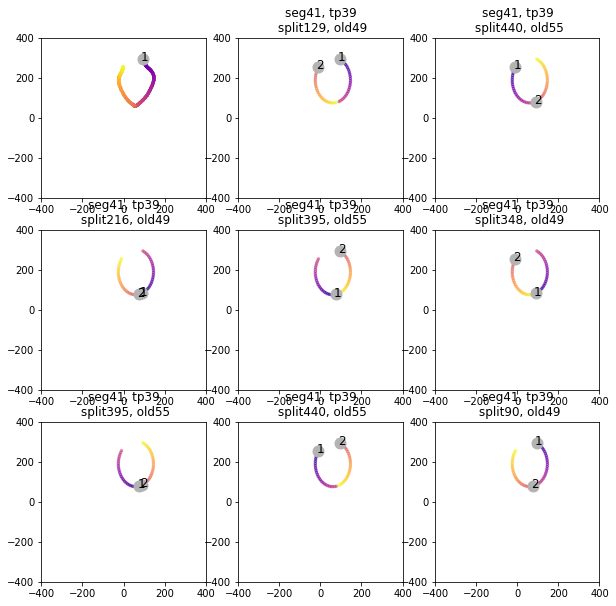

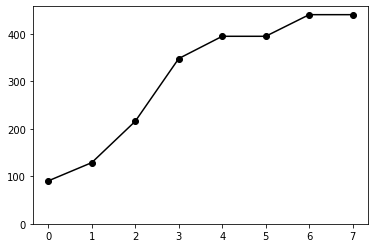

In [668]:
## TESTING CODE DEVO - this is comparing differnet distance measures using diff parses and one task. 
# this code already saved.

from pythonlib.tools.stroketools import distanceDTW

# s1 = strokes_all[0]
# s2 = strokes_all[1]
# distanceDTW(s1, s2, ver="segments")[0]



# =============== plot overview of distances
targ = {
    "task_stage":["circle_partial", "three_lines_natural"],
    "fracsuccess_min":[0.25]
}

trials_list = getIndsTrials(filedata, targ)
trials_list = removeRedundantTrials(filedata, trials_list)

## ============= POSITIVE CONTROL
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
strokes_all = stroke_dict["strokes_all"]

tasks = [getTrialsTask(filedata, t) for t in trials_list]
strokes_all_task = [getTrialsTaskAsStrokes(filedata, t, fake_timesteps="from_orig") for t in trials_list]
fix_all_task = [getTrialsFix(filedata, t)["fixpos_pixels"] for t in trials_list]

for strokes, t, f in zip(strokes_all_task, tasks, fix_all_task):
    t["strokes"] = strokes
    t["fixpos"] = f
dset = Dataset(strokes_all, tasks)
mod = Model("uniform", priorFunction, likeliFunction)
dset.applyModel(mod, parses_bothdir=True, prior_ver= "softmax", posterior_ver="weighted")

##########################
if False:
    stroke1 = strokes_all[1]
    strokeothers = random.sample([strokes_all[i] for i in range(len(strokes_all))], 8)
else:
    t = 11
    stroke1=dset.trials[t]["behavior"]["strokes"]
    strokes_model = [d["strokes"] for d in dset.trials[t]["model_parses"]]
    strokeothers = random.sample([strokes_model[i] for i in range(len(strokes_model))], 8)
VER = "segments"

plt.figure(figsize=(10,10))
ax = plt.subplot(3,3,1)
plotDatStrokes(stroke1, ax, plotver="raw")
plt.xlim([-400, 400])
plt.ylim([-400, 400])

distances = []
for i, S in enumerate(strokeothers):
    # get distance
#     d1 = distanceDTW(stroke1, S, ver="segments")[0]
#     d2 = distanceDTW(stroke1, S, ver="timepoints")[0]
    d3, tmp = distanceDTW(stroke1, S, ver="split_segments")
    print(tmp)
    d4 = distanceBetweenStrokes(stroke1, S)
    distances.append(d3)
    ax = plt.subplot(3,3,i+2)
    plt.title(f"seg{d1:.0f}, tp{d2/1000:.0f}\n split{d3:.0f}, old{d4:.0f}")
    plotDatStrokes(S, ax=ax, plotver="raw")
    plt.xlim([-400, 400])
    plt.ylim([-400, 400])
plt.figure()
plt.plot(np.sort(distances), 'o-k');
plt.ylim(bottom=0)

In [640]:
dset.applyModel(mo()

TypeError: applyModel() missing 1 required positional argument: 'model'

In [543]:
from pythonlib.tools import stroketools as ST
A = np.random.rand(22,3)
ST._splitarray(A, num=3)

[array([[0.67891716, 0.69036121, 0.60387686],
        [0.28289626, 0.5837209 , 0.85548991],
        [0.52072014, 0.76869214, 0.95899815],
        [0.93636916, 0.98999024, 0.79814588],
        [0.108205  , 0.29887002, 0.24429348],
        [0.14813108, 0.67465026, 0.4853159 ],
        [0.87313109, 0.16440005, 0.11465309],
        [0.63979671, 0.29795733, 0.13709415]]),
 array([[0.69600741, 0.42629216, 0.18718666],
        [0.10538027, 0.75142107, 0.3709027 ],
        [0.06831178, 0.93973019, 0.90204058],
        [0.89493329, 0.41444201, 0.46672419],
        [0.59065302, 0.49509767, 0.96313756],
        [0.40717658, 0.13043724, 0.73561399],
        [0.47029806, 0.31163507, 0.81920409]]),
 array([[0.06329178, 0.31255878, 0.34276156],
        [0.48991185, 0.57959489, 0.90552341],
        [0.55751636, 0.53358567, 0.28021972],
        [0.8911753 , 0.4744817 , 0.43818452],
        [0.6722995 , 0.34832902, 0.14019567],
        [0.42668231, 0.52752975, 0.39538013],
        [0.09245265, 0.0853987

In [456]:
list(range(2,10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [432]:
from math import isclose
isclose(1000.0000001, 1000.)

True

In [271]:
## build prior model that 

In [127]:
print(len(dset.trials[0]["behavior"]))
print(len(dset.trials[0]["task"]))
print(len(dset.trials[0]["model_parses"]))

print(dset.trials[0]["behavior"].keys())
print(dset.trials[0]["task"].keys())
print(dset.trials[0]["model_parses"][0].keys())

print(dset.trials[0]["behavior"].keys())
print(id(dset.trials[0]["task"]["strokes"][1]))
print(id(dset.trials[0]["model_parses"][0]["strokes"][0]))

1
14
2
dict_keys(['strokes'])
dict_keys(['str', 'stage', 'x', 'y', 'alwaysnogap', 'ignore_edge_requirement', 'stagenum', 'num_presentations', 'num_successes', 'num_fixations', 'ignore', 'x_rescaled', 'y_rescaled', 'strokes'])
dict_keys(['strokes', 'order', 'score', 'prob', 'mod_hu_dist'])
dict_keys(['strokes'])
140422119541936
140421912659808


In [88]:
dset.trials[0]["model"].keys()

dict_keys(['str', 'stage', 'x', 'y', 'alwaysnogap', 'ignore_edge_requirement', 'stagenum', 'num_presentations', 'num_successes', 'num_fixations', 'ignore', 'x_rescaled', 'y_rescaled', 'strokes'])

In [69]:
mod_uniform

In [19]:
%load_ext autoreload
%autoreload 2

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *

animal = "Pancho";
date = 200226
expt = "pilot"
session = 1

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

# -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
# --- for a given set of trials, collect trajectories for all of them

targ = {
    "task_stage":["two_lines_anywhere"],
    "fracsuccess_min":[0.25]
}

trials_list = getIndsTrials(filedata, targ)
trials_list = removeRedundantTrials(filedata, trials_list)

## ============= POSITIVE CONTROL
VER="v1"
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
# 2) remove short segments
stroke_dict = processRemoveShortStrokes(stroke_dict)
# i) reorder all of the task strokes [i.e., based on a model]
stroke_dict = processReorderStrokes(stroke_dict, filedata, method="distance",
                                         reassign_timestamps=False)
# ii) reassign time stamps for task strokes, so that match behavior best
stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_first_touch", replace_key_to_do=True)
stroke_dict = processFakeTimesteps(stroke_dict, filedata, ver="from_end_of_previous_stroke", replace_key_to_do=True)
# iii) gets angles of strokes
stroke_dict = processAngles(stroke_dict)
# iv) assign each subject stroke to a task stroke
stroke_dict = processAssignStrokes(stroke_dict, ver=VER)
# v) get beh-model distances (posterior scores)
stroke_dict = processPosteriorScores(stroke_dict, filedata, method_prior="distance")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl
got 159 total trials
THIS NOT OPTIMAL - see notes. is ok if same tasks always occur in direct succession chron order.
started with 159 trials
ended with 93 trials
[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime


In [14]:
m = Model()
m.likeliFunction()

TypeError: 'NoneType' object is not callable